In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
df =pd.read_csv(r'mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null int32
cap-shape                   8124 non-null float64
cap-surface                 8124 non-null float64
cap-color                   8124 non-null float64
bruises                     8124 non-null float64
odor                        8124 non-null float64
gill-attachment             8124 non-null float64
gill-spacing                8124 non-null float64
gill-size                   8124 non-null float64
gill-color                  8124 non-null float64
stalk-shape                 8124 non-null float64
stalk-root                  8124 non-null float64
stalk-surface-above-ring    8124 non-null float64
stalk-surface-below-ring    8124 non-null float64
stalk-color-above-ring      8124 non-null float64
stalk-color-below-ring      8124 non-null float64
veil-type                   8124 non-null float64
veil-color                  8124 non-null flo

In [15]:
df.describe(include='all')

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8.124000e+03,8124.000000,8.124000e+03,8124.000000,8124.000000,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,...,8.124000e+03,8.124000e+03,8.124000e+03,8124.0,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03,8.124000e+03
mean,0.482029,1.189486e-16,0.000000,-6.996974e-18,0.000000,0.000000,1.819213e-16,1.399395e-17,-8.396369e-17,-2.798790e-17,...,5.597579e-17,-1.959153e-16,-2.798790e-17,0.0,1.959153e-16,1.399395e-16,5.597579e-17,-1.119516e-16,-1.469365e-16,5.597579e-17
std,0.499708,1.000062e+00,1.000062,1.000062e+00,1.000062,1.000062,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,...,1.000062e+00,1.000062e+00,1.000062e+00,0.0,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00
min,0.000000,-2.087047e+00,-1.486157,-1.769549e+00,-0.843230,-1.970316,-6.138869e+00,-4.388636e-01,-6.690383e-01,-1.358896e+00,...,-2.372490e+00,-3.058611e+00,-3.038361e+00,0.0,-8.100146e+00,-3.945519e+00,-1.272216e+00,-1.509643e+00,-2.910546e+00,-8.771691e-01
25%,0.000000,-8.403434e-01,-1.486157,-5.910746e-01,-0.843230,-1.019565,1.628965e-01,-4.388636e-01,-6.690383e-01,-7.939470e-01,...,-8.930529e-01,9.657680e-02,1.076554e-01,0.0,1.420366e-01,-2.561317e-01,-1.272216e+00,-6.701949e-01,-5.143892e-01,-8.771691e-01
50%,0.000000,-2.169915e-01,0.140128,-1.982498e-01,-0.843230,0.406562,1.628965e-01,-4.388636e-01,-6.690383e-01,5.347685e-02,...,5.863847e-01,6.224414e-01,6.319914e-01,0.0,1.420366e-01,-2.561317e-01,-1.620674e-01,-2.504706e-01,2.843298e-01,-2.957297e-01
75%,1.000000,1.029712e+00,0.953270,1.373049e+00,1.185917,0.406562,1.628965e-01,-4.388636e-01,1.494683e+00,6.184261e-01,...,5.863847e-01,6.224414e-01,6.319914e-01,0.0,1.420366e-01,-2.561317e-01,9.480809e-01,1.428426e+00,2.843298e-01,2.857098e-01
max,1.000000,1.029712e+00,0.953270,1.765874e+00,1.185917,1.832689,1.628965e-01,2.278612e+00,1.494683e+00,1.748325e+00,...,2.065822e+00,1.148306e+00,1.156327e+00,0.0,4.263128e+00,3.433255e+00,9.480809e-01,1.848151e+00,1.083049e+00,2.611468e+00


In [7]:
from sklearn.preprocessing import LabelEncoder
#instantiate labelencoder object
le = LabelEncoder()

In [10]:
df[ df.columns] = df[df.columns].apply(lambda col: le.fit_transform(col))
df[df.columns].head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
5,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1
6,0,0,2,8,1,0,1,0,0,2,...,2,7,7,0,2,1,4,2,2,3
7,0,0,3,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,3,3
8,1,5,3,8,1,6,1,0,1,7,...,2,7,7,0,2,1,4,2,4,1
9,0,0,2,9,1,0,1,0,0,2,...,2,7,7,0,2,1,4,2,3,3


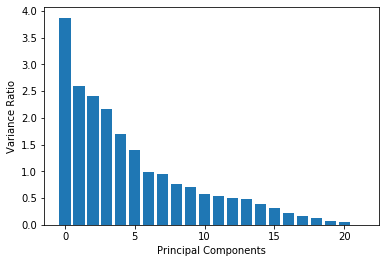

In [31]:
pca = PCA()
pca.fit_transform(df[cols])
pca_variance=pca.explained_variance_
plt.bar(range(22), pca_variance)
plt.ylabel('Variance Ratio')
plt.xlabel('Principal Components')
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler
cols = df.columns[df.columns!='class']
df[cols] = StandardScaler().fit_transform(df[cols])

In [12]:
pca = PCA(n_components=17)
x_pca = pca.fit_transform(df[cols])
sum(pca.explained_variance_ratio_)

0.979723853875485

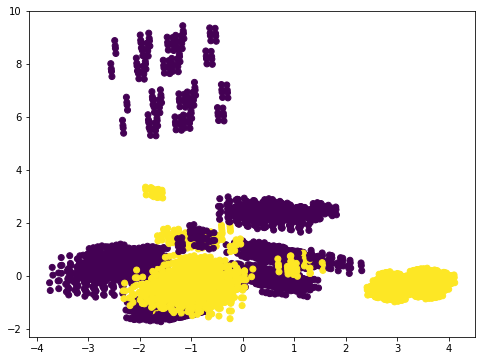

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,3], c=df['class'])
plt.show()

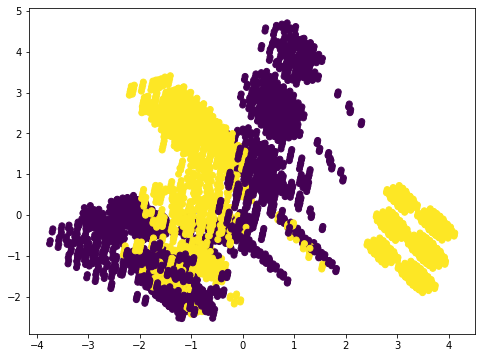

In [32]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(df[cols])

plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=df['class'])
plt.show()